In [3]:
# Import Necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [5]:
# load data
df = pd.read_csv(r'google_stock_dataset.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,8/20/2004,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
1,8/23/2004,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2,8/24/2004,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
3,8/25/2004,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
4,8/26/2004,52.527527,54.029030,52.382381,54.009010,54.009010,7094898
...,...,...,...,...,...,...,...
4425,3/18/2022,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4426,3/21/2022,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4427,3/22/2022,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4428,3/23/2022,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4430 entries, 0 to 4429
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4430 non-null   object 
 1   Open       4430 non-null   float64
 2   High       4430 non-null   float64
 3   Low        4430 non-null   float64
 4   Close      4430 non-null   float64
 5   Adj Close  4430 non-null   float64
 6   Volume     4430 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [7]:
df.shape

(4430, 7)

In [8]:
# Set Date as index (optional)
df.set_index('Date', inplace=True)

In [9]:
#chech if there is null values
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<AxesSubplot:xlabel='Date'>

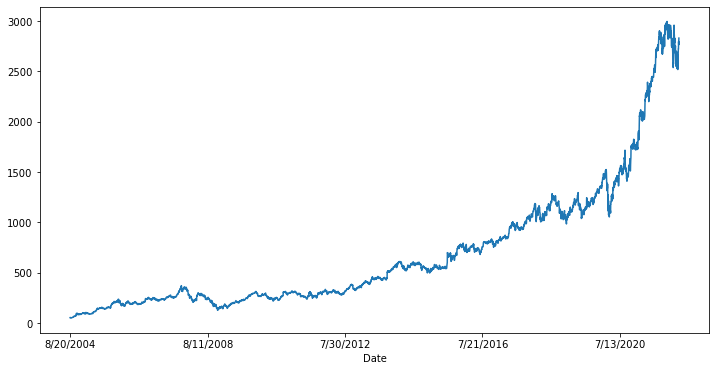

In [10]:
# Lets plot the target 'Close'
df['Close'].plot(figsize=(12,6))

In [11]:
# Define features (X) and target (y)
# X = df[["Open"]]
X = df[["Open", "High", "Low", "Volume"]]
y = df["Close"]

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
X_train.shape, y_train.shape

((3544, 4), (3544,))

In [14]:
# Scale the data (optional but recommended for regression models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
# Build and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [16]:
# Train the model
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [17]:
# Make predictions
y_pred = rf_model.predict(X_test_scaled)

In [18]:
# Lets print actual and predicted price togother
_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
_df

,Actual,Predicted
Date,,
10/2/2014,580.880005,579.502536
12/24/2007,350.715729,347.250997
11/4/2020,1745.849976,1754.713503
6/19/2008,280.380371,278.617370
11/22/2005,208.443436,206.449799
...,...,...
6/4/2018,1153.040039,1151.583588
10/19/2018,1105.180054,1107.157092
5/15/2015,546.489990,547.744702


In [19]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Model Evaluation:
Mean Squared Error (MSE): 59.10887220952032
Mean Absolute Error (MAE): 4.100944598826183
R-squared (R2): 0.9998692569280303


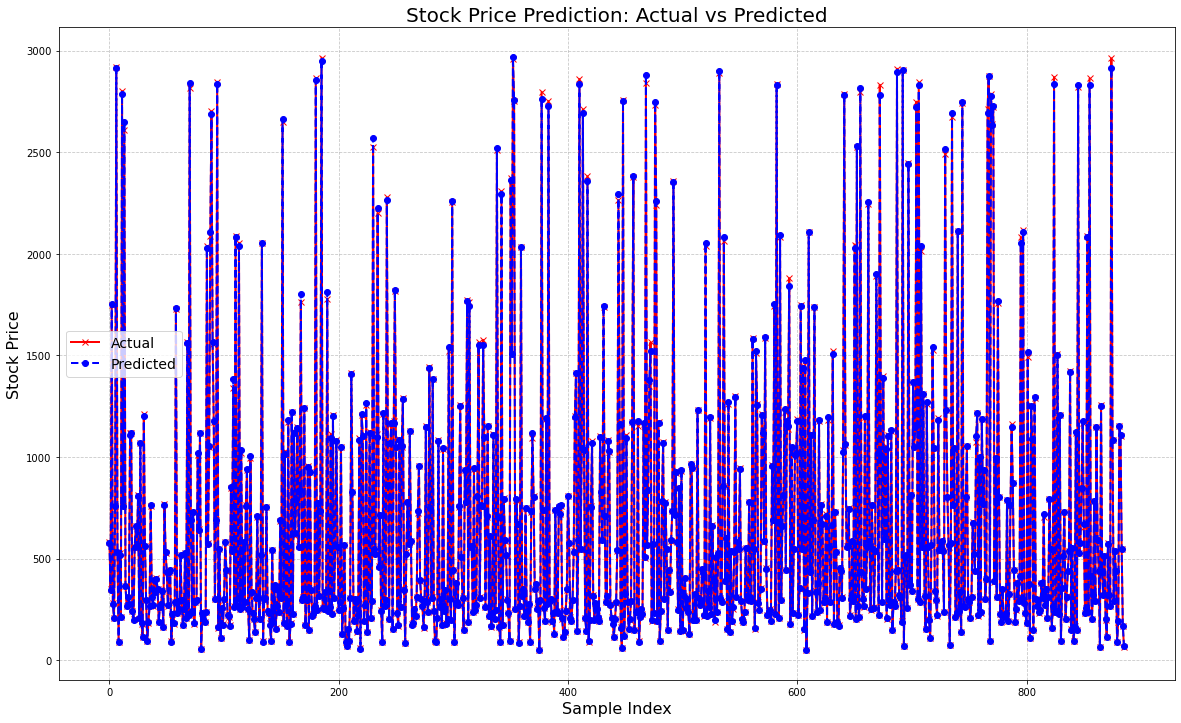

In [21]:
import matplotlib.pyplot as plt

# Plot the predictions vs. actual values
plt.figure(figsize=(20, 12))
plt.plot(y_test.values, label="Actual", marker='x', color='red', linestyle='-', linewidth=2)
plt.plot(y_pred, label="Predicted", marker='o', color='blue', linestyle='--', linewidth=2)
plt.title("Stock Price Prediction: Actual vs Predicted", fontsize=20)
plt.xlabel("Sample Index", fontsize=16)
plt.ylabel("Stock Price", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


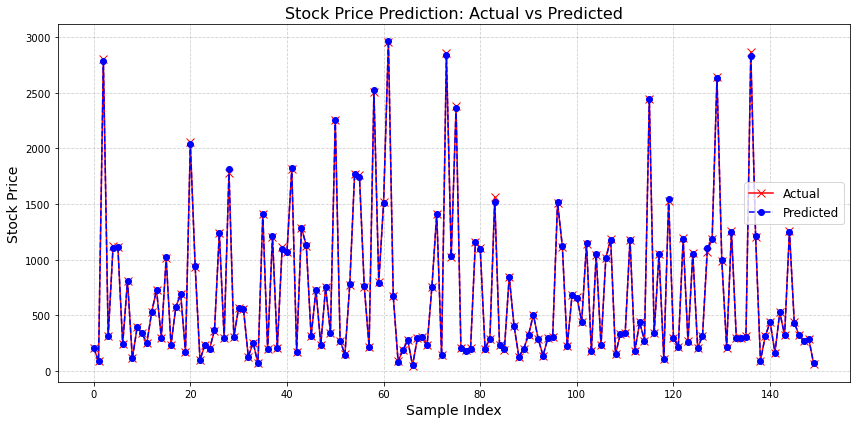

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the number of samples to take
num_samples = 150

# Generate random indices without replacement from the test data
random_indices = np.random.choice(len(y_test), size=num_samples, replace=False)

# Take corresponding samples from actual and predicted values
test_sample = y_test.values[random_indices]
predicted_sample = y_pred[random_indices]

# Optional: Sort the samples by their random indices for better sequential visualization
sorted_indices = np.argsort(random_indices)
test_sample = test_sample[sorted_indices]
predicted_sample = predicted_sample[sorted_indices]

# Plot the predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_sample, label="Actual", marker='x', color='red', linestyle='-', markersize=8, linewidth=1.5)
plt.plot(predicted_sample, label="Predicted", marker='o', color='blue', linestyle='--', markersize=6, linewidth=1.5)
plt.title("Stock Price Prediction: Actual vs Predicted", fontsize=16)
plt.xlabel("Sample Index", fontsize=14)
plt.ylabel("Stock Price", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [24]:
# Let's do some sample predictions
new_data = pd.DataFrame({
    "Open": [56.0],
    "High": [57.0],
    "Low": [55.5],
    "Volume": [20000000]
})
new_data_scaled = scaler.transform(new_data)
predicted_close = rf_model.predict(new_data_scaled)
print("Predicted Close Price:", predicted_close)

Predicted Close Price: [55.92622553]
